In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def sigmoid(X):
    return 1/(1+np.exp(-X))


def derivative_of_sigmoid(X):
    return sigmoid(X) * (1 - sigmoid(X))


def feed_forward(X, W1, W2, B):
    Z2 = np.matmul(X, W1) + B[0]
    A2 = sigmoid(Z2)
    Z3 = np.matmul(A2, W2) + B[1]
    Y_ = sigmoid(Z3)
    return Y_


def cost_function(Y_, Y):
    return sum(((Y_ - Y) ** 2)[0]) / 2


#Backpropagation
def compute_derivatives(X, W1, W2, B):
    Z2 = np.matmul(X, W1) + B[0]
    A2 = sigmoid(Z2)
    Z3 = np.matmul(A2, W2) + B[1]
    Y_ = sigmoid(Z3)
    
    DW2 = np.matmul(A2.T, (Y_ - Y) * derivative_of_sigmoid(Z3))
    DW1 = np.matmul(X.T, ( (np.matmul((Y_ - Y) * derivative_of_sigmoid(Z3), W2.T)) * derivative_of_sigmoid(Z2)  ))
    
    B1 = (Y_ - Y) * derivative_of_sigmoid(Z3)
    B2 = (np.matmul((Y_ - Y) * derivative_of_sigmoid(Z3), W2.T)) * derivative_of_sigmoid(Z2)
    
    return DW1, DW2, B1, B2


def gradient_descent(X, W1, W2, B, learning_rate = 0.0005):
    DW1, DW2, B1, B2 = compute_derivatives(X, W1, W2, B)
    
    W1 = W1 - learning_rate * DW1
    W2 = W2 - learning_rate * DW2
    B1 = B[0] - learning_rate * B1
    B2 = B[1] - learning_rate * B2
    B = np.array([B1, B2])
    
    return W1, W2, B 

In [3]:
B1 = .35
B2 = .60

B = np.array([B1, B2])

W1 = np.array([
    [.15, .25],
    [.20, .30]
])

W2 = np.array([
    [.40, .50],
    [.45, .55]
])


X = np.array([
    [.05, .10]
    #[.02, .11]
])


Y = np.array([
    [.01, .99]
    #[.99, .01]
])

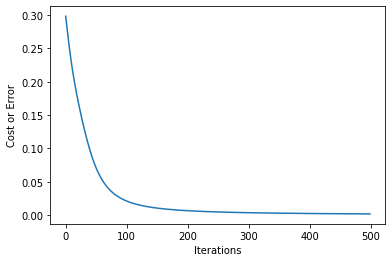

In [99]:
J_ = []
for i in range(500):
    output = feed_forward(X, W1, W2, B)
    J = cost_function(output, Y)
    W1,  W2, B = gradient_descent(X, W1, W2, B, 0.5)
    J_.append(J)

plt.plot(list(range(500)), J_)
plt.xlabel("Iterations")
plt.ylabel("Cost or Error")
plt.show()

output = feed_forward(X, W1, W2, B)
J = cost_function(output, Y)
print("Cost =", J)

In [7]:
output = feed_forward(X, W1, W2, B)
J = cost_function(output, Y)
print("Cost =", J)

Cost = 0.2902433811727934


In [6]:
W1,  W2, B = gradient_descent(X, W1, W2, B, 0.5)